<a href="https://colab.research.google.com/github/wanwanliang/ML_Practice/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3,5)
import sklearn
assert sklearn.__version__ >= '0.20'
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris['data']
y = iris['target']
y[:5]

array([0, 0, 0, 0, 0])

In [3]:
x_df = pd.DataFrame(iris['data'])
y_df = pd.DataFrame(iris['target'])

In [4]:
x_df.shape[1]

4

In [5]:
nms = []
[nms.append("Var" + str(i)) for i in range(x_df.shape[1])]
nms

['Var0', 'Var1', 'Var2', 'Var3']

In [6]:
x_df.columns = nms
x_df.head(5)

,Var0,Var1,Var2,Var3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
df = x_df
df['Species']= pd.DataFrame(iris['target'])
df.head(5)

,Var0,Var1,Var2,Var3,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Var3')

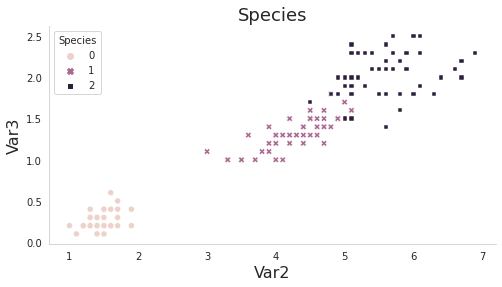

In [9]:
plt.figure(figsize = (8, 4))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='Var2', y='Var3', hue='Species', style='Species',sizes=10)
plt.title("Species", fontsize=18)
plt.grid(False)
plt.xlabel("Var2", fontsize=16)
plt.ylabel("Var3", fontsize=16)

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(x).predict(x)
mapping = np.array([2,0,1])

pd.DataFrame(y_pred).value_counts()
np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([45, 55, 50]))

In [13]:
df['Cluster']=y_pred
df.head(5)

,Var0,Var1,Var2,Var3,Species,Cluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


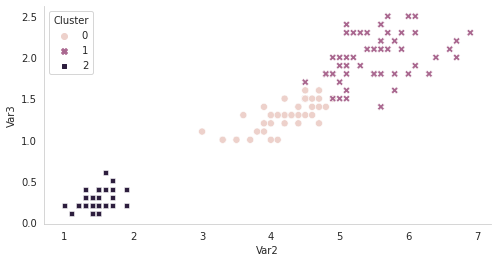

In [14]:
plt.figure(figsize=(8,4))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
sns.scatterplot(data=df, x=df.Var2, y=df.Var3,s=50, hue=df.Cluster, style=df.Cluster)
plt.grid(False)
plt.show()

In [15]:
np.sum(y_pred==y)

5

In [16]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
1- 5/150

0.9666666666666667

## K-Means 

In [18]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [19]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid(False)

In [20]:
X[:5]

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       [-2.94032324,  1.80224569],
       [-2.72483644,  1.68358492]])

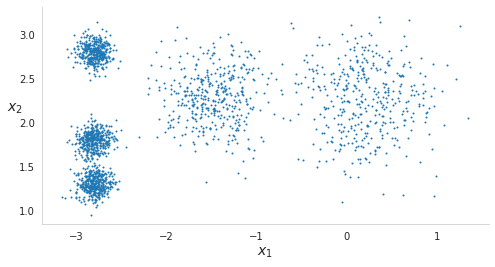

In [21]:
plt.figure(figsize=(8, 4))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plot_clusters(X)
plt.show()

In [22]:
from sklearn.cluster import KMeans

In [23]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [24]:
pd.DataFrame(y_pred).value_counts()

3    405
1    402
4    400
0    397
2    396
dtype: int64

In [25]:
pd_x = pd.DataFrame(X)
pd_x.head(5)

,0,1
0,-2.698239,1.345470
1,-2.874598,1.809757
2,0.960771,1.170468
3,-2.940323,1.802246
4,-2.724836,1.683585


In [26]:
pd_x.columns= ['X1', "X2"]
pd_x['Cluster']= y_pred
pd_x.head(5)

,X1,X2,Cluster
0,-2.698239,1.345470,4
1,-2.874598,1.809757,1
2,0.960771,1.170468,0
3,-2.940323,1.802246,1
4,-2.724836,1.683585,1


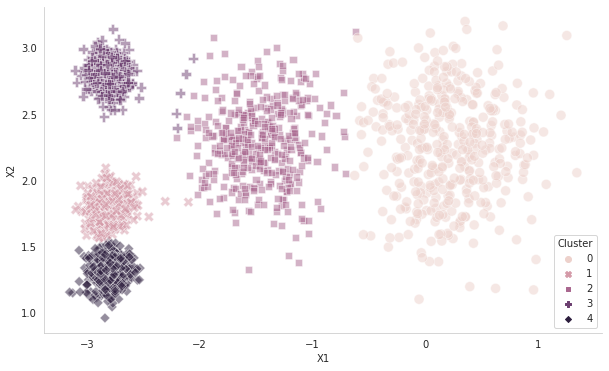

In [27]:
plt.figure(figsize=(10,6))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#sns.scatterplot(data=pd_x, x='X1', y="X2", hue="Cluster", s=100, style='Cluster', alpha=0.5, size='Cluster')
sns.scatterplot(data=pd_x, x='X1', y="X2", hue="Cluster", s=100, style='Cluster', alpha=0.5)

plt.grid(False)

In [28]:
y_pred is kmeans.labels_

True

In [29]:
np.allclose(y_pred, kmeans.labels_)

True

In [30]:
ctds = pd.DataFrame(kmeans.cluster_centers_)
ctds.columns = ['X1', "X2"]
ctds['Cluster']=ctds.index
ctds.head()

,X1,X2,Cluster
0,0.208763,2.255513,0
1,-2.803896,1.801180,1
2,-1.466796,2.285853,2
3,-2.792903,2.796411,3
4,-2.800376,1.300826,4


In [31]:
ctds.index

RangeIndex(start=0, stop=5, step=1)

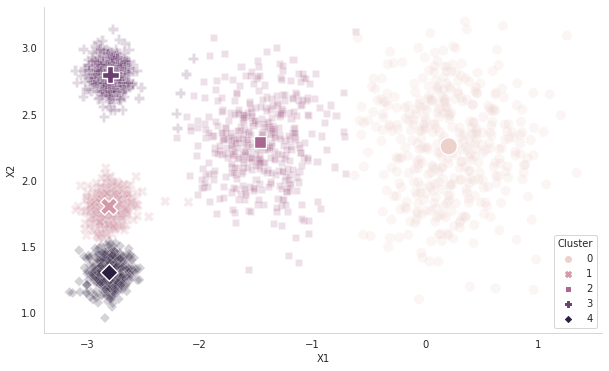

In [32]:
plt.figure(figsize=(10,6))
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.grid(False)
sns.scatterplot(data=pd_x, x='X1', y='X2', hue='Cluster', style='Cluster',alpha=0.2, s=100)
sns.scatterplot(data=ctds, x='X1', y='X2',style="Cluster", hue='Cluster', s=300, legend=False)
plt.show()

In [33]:
def clusters_boundary(cluster_model,X, resolution, legend, title):
  xmin, xmax = X[:,0].min(),X[:,0].max()
  ymin, ymax = X[:,1].min(),X[:,1].max()

  xs = np.linspace(xmin, xmax, resolution)
  ys = np.linspace(ymin, ymax, resolution)

  xx, yy = np.meshgrid(xs, ys)
  xys = np.c_[xx.ravel(), yy.ravel()]
  xy_pred = cluster_model.predict(xys)

  z = xy_pred.reshape(xx.shape)
  
  y_pred = cluster_model.predict(X)
  pd_x = pd.DataFrame(X)
  pd_x.columns= ['X1', "X2"]
  pd_x['Cluster']= y_pred

  ctds = pd.DataFrame(cluster_model.cluster_centers_)
  ctds.columns = ['X1', "X2"]
  ctds['Cluster']=ctds.index

  plt.gca().spines['top'].set_color('none')
  plt.gca().spines['right'].set_color('none')
  plt.grid(False)
  plt.title(title, fontsize=18)
  sns.scatterplot(data=pd_x, x='X1', y='X2', hue='Cluster', style='Cluster',alpha=0.5, s=100, legend=legend)
  sns.scatterplot(data=ctds, x='X1', y='X2',style="Cluster", hue='Cluster', s=300, legend=False)

  plt.contourf(z, extent=(xmin, xmax, ymin, ymax), cmap='Pastel2',alpha=0.1)
  plt.contour(z, extent=(xmin, xmax, ymin, ymax), linewidths=1, colors='k', alpha=0.1)
  plt.xlabel("$X_1$", fontsize=16)
  plt.ylabel("$X_2$", fontsize=16)


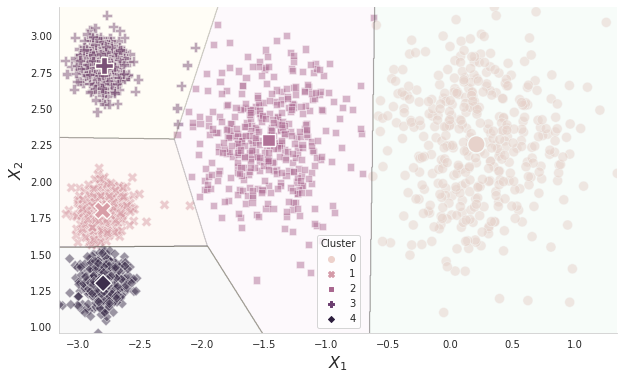

In [34]:
plt.figure(figsize=(10,6))
clusters_boundary(kmeans, X, 1000, legend=True, title="")
plt.show()

In [35]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=6)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=6)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=10, random_state=6)
kmeans_iter4 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=100, random_state=6)
kmeans_iter5 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=200, random_state=6)
kmeans_iter6 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=500, random_state=6)


kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)
kmeans_iter5.fit(X)
kmeans_iter6.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=500, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=6,
       tol=0.0001, verbose=0)

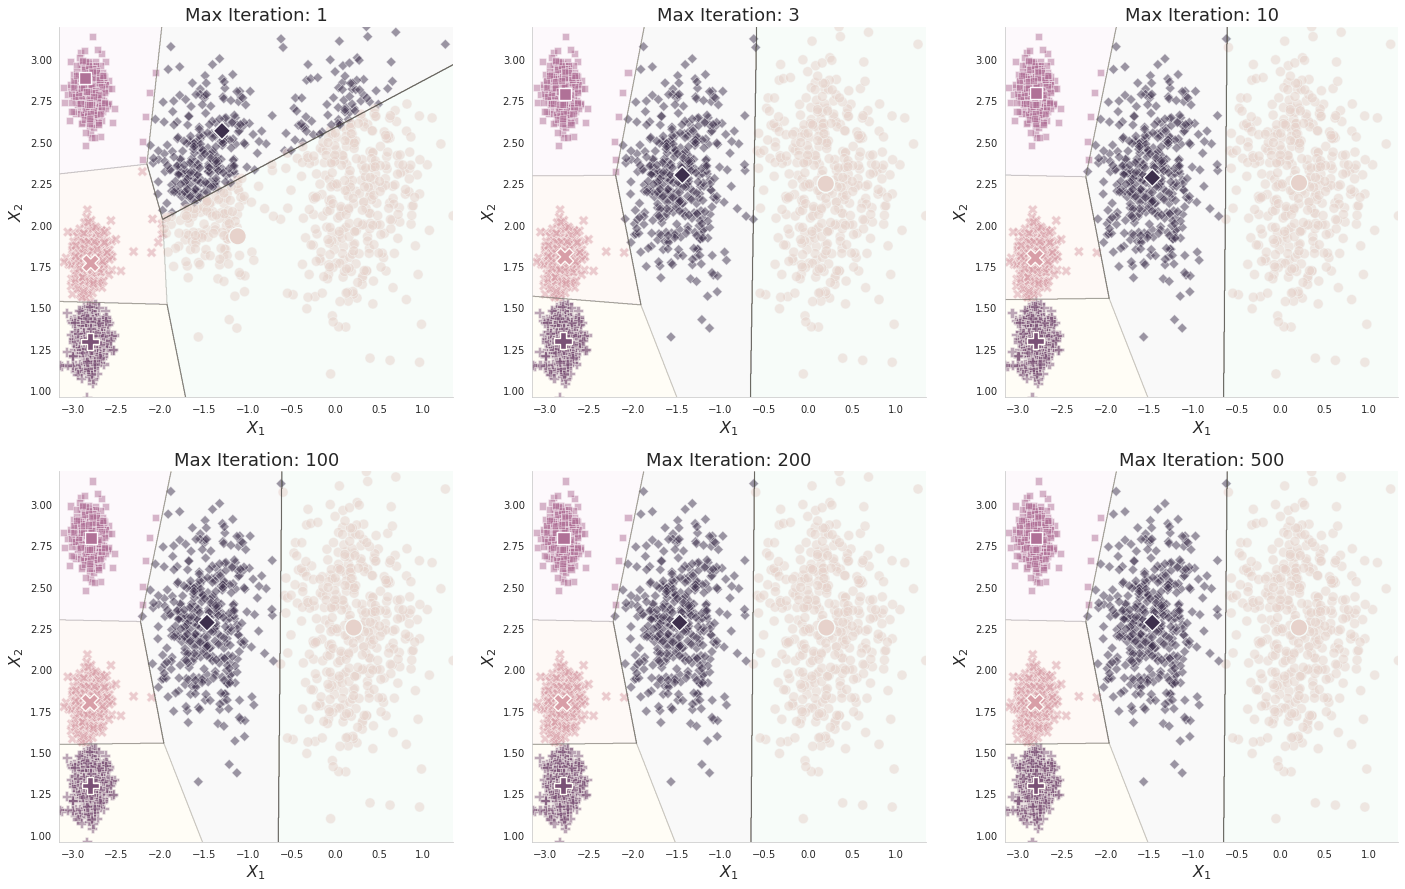

In [36]:
plt.figure(figsize=(24,15))
plt.subplot(231)
clusters_boundary(kmeans_iter1, X, 1000, legend=False, title="Max Iteration: 1")
plt.subplot(232)
clusters_boundary(kmeans_iter2, X, 1000, legend=False, title="Max Iteration: 3")
plt.subplot(233)
clusters_boundary(kmeans_iter3, X, 1000, legend=False, title="Max Iteration: 10")
plt.subplot(234)
clusters_boundary(kmeans_iter4, X, 1000, legend=False, title="Max Iteration: 100")
plt.subplot(235)
clusters_boundary(kmeans_iter5, X, 1000, legend=False, title="Max Iteration: 200")
plt.subplot(236)
clusters_boundary(kmeans_iter6, X, 1000, legend=False, title="Max Iteration: 500")
plt.show()

In [37]:
kmeans_iter1b = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=1, random_state=6)
kmeans_iter2b = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=3, random_state=6)
kmeans_iter3b = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=10, random_state=6)
kmeans_iter4b = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=100, random_state=6)
kmeans_iter5b = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=200, random_state=6)
kmeans_iter6b = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=500, random_state=6)


kmeans_iter1b.fit(X)
kmeans_iter2b.fit(X)
kmeans_iter3b.fit(X)
kmeans_iter4b.fit(X)
kmeans_iter5b.fit(X)
kmeans_iter6b.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

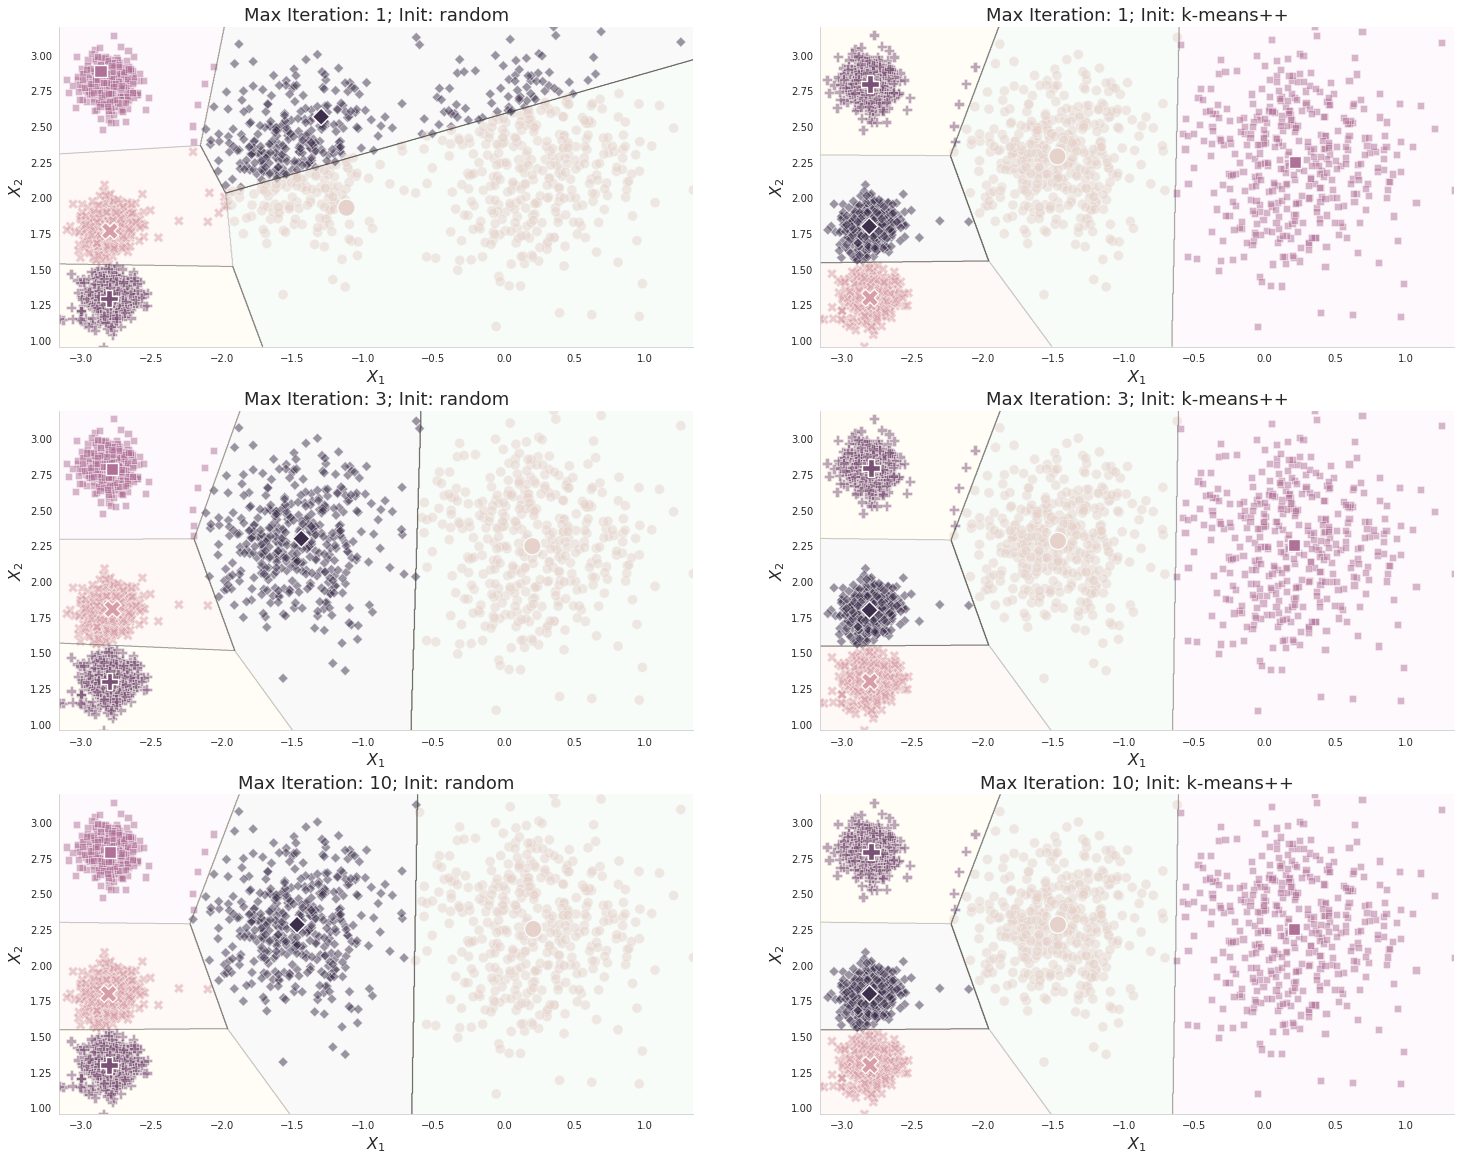

In [38]:
plt.figure(figsize=(25,20))
plt.subplot(321)
clusters_boundary(kmeans_iter1, X, 1000, legend=False, title="Max Iteration: 1; Init: random")
plt.subplot(322)
clusters_boundary(kmeans_iter1b, X, 1000, legend=False, title="Max Iteration: 1; Init: k-means++")
plt.subplot(323)
clusters_boundary(kmeans_iter2, X, 1000, legend=False, title="Max Iteration: 3; Init: random")
plt.subplot(324)
clusters_boundary(kmeans_iter2b, X, 1000, legend=False, title="Max Iteration: 3; Init: k-means++")
plt.subplot(325)
clusters_boundary(kmeans_iter3, X, 1000, legend=False, title="Max Iteration: 10; Init: random")
plt.subplot(326)
clusters_boundary(kmeans_iter3b, X, 1000, legend=False, title="Max Iteration: 10; Init: k-means++")
plt.show()

### Inertia

In [39]:
kmeans.inertia_

211.5985372581684

In [40]:
X_dist = kmeans.transform(X)
print(X_dist.shape)
X_dist[:5]

(2000, 5)


array([[3.04611916, 0.46779778, 1.54944305, 1.45402521, 0.11146795],
       [3.11541584, 0.07122059, 1.48612753, 0.99002955, 0.51431557],
       [1.32016676, 3.81713488, 2.67154781, 4.09069201, 3.76340605],
       [3.18153989, 0.13643124, 1.55085758, 1.00503563, 0.52058348],
       [2.98883057, 0.14170053, 1.39477359, 1.11490543, 0.39014221]])

### Accelerated K-Means

In [41]:
%timeit -n 100 KMeans(algorithm='elkan').fit(X)

100 loops, best of 3: 89.4 ms per loop


In [42]:
%timeit -n 100 KMeans(algorithm='full').fit(X)

100 loops, best of 3: 130 ms per loop


### Mini-Batch K-Means

In [43]:
from sklearn.cluster import MiniBatchKMeans

In [46]:
mb_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mb_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [47]:
print(mb_kmeans.inertia_)
print(kmeans.inertia_)

211.93186531476775
211.5985372581684


In [49]:
from sklearn.datasets import fetch_openml
import urllib

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], random_state=42)

In [52]:
filename = 'my_mnist.data'
X_mm = np.memmap(filename, dtype='float32', mode='write', shape = X_train.shape)
X_mm[:] = X_train

In [54]:
mb_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
mb_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [70]:
def load_next_batch(batch_size):
  return X[np.random.choice(len(X), batch_size, replace=False)]

In [71]:
np.random.seed()
k=5
n_init=10
n_iterations = 100
batch_size=100
init_size = 500
evaluate_on_last_n_iters=10

best_kmeans = None

for init in range(n_init):

  mb_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
  X_init = load_next_batch(init_size)
  mb_kmeans.partial_fit(X_init)

  mb_kmeans.sum_inertia = 0

  for iteration in range(n_iterations):
    
    X_batch = load_next_batch(batch_size)
    mb_kmeans.partial_fit(X_batch)

    if iteration >= n_iterations - evaluate_on_last_n_iters:
      mb_kmeans.sum_inertia += mb_kmeans.inertia_
  if (best_kmeans is None or
      mb_kmeans.sum_inertia < best_kmeans.sum_inertia):
      best_kmeans = mb_kmeans

In [72]:
best_kmeans.score(X)

-211.6864163999652

In [73]:
%timeit KMeans(n_clusters=5).fit(X)

10 loops, best of 3: 50.1 ms per loop


In [74]:
%timeit KMeans(n_clusters=5, algorithm='full').fit(X)

10 loops, best of 3: 71.8 ms per loop


In [75]:
%timeit KMeans(n_clusters=5, algorithm='elkan').fit(X)

10 loops, best of 3: 50.5 ms per loop


In [76]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

10 loops, best of 3: 30.7 ms per loop


In [115]:
from timeit import timeit
times = np.empty((100,2))
inertias = np.empty((100,2))

for k in range(1,101):

  kmeans= KMeans(n_clusters=k, random_state=42)
  mn_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
  print("\r{}/{}".format(k, 100), end="")
  times[k-1,0]= timeit('kmeans.fit(X)', number=10, globals=globals())
  times[k-1,1]= timeit('mn_kmeans.fit(X)', number=10, globals=globals())

  inertias[k-1,0]= kmeans.inertia_
  inertias[k-1,1]= mn_kmeans.inertia_

100/100

In [114]:
inertias

[3534.8360871670784,
 1149.6140723750277,
 653.2167190021553,
 261.79677785694696,
 211.5985372581684,
 169.2556273906365,
 141.38336489568496,
 118.41983763508077,
 102.52962740703077,
 92.63120846009201,
 86.18844868516986,
 80.82666982095573,
 76.45470695558627,
 71.184213514773,
 67.51198000261881,
 64.71657325688811,
 61.31195103336529,
 59.07412800019615,
 56.244851468777114,
 53.98947199415299]

In [96]:
np.array(range(1,101))[:]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

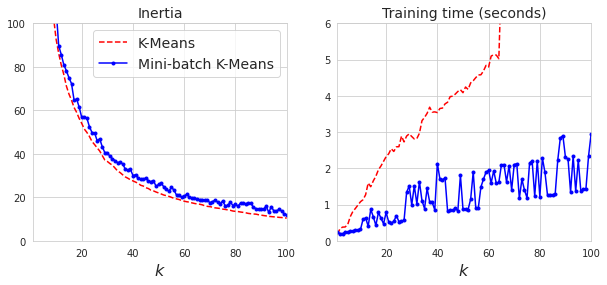

In [117]:
plt.figure(figsize=(10,4))
x = np.linspace(1,100,100,dtype=np.uint8)
plt.subplot(121)
plt.plot(x, inertias[:, 0], "r--", label="K-Means")
plt.plot(x, inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(x, times[:, 0], "r--", label="K-Means")
plt.plot(x, times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### Find the optimal number of clusters

In [118]:
inertias_va = [KMeans(n_clusters=i, random_state=42).fit(X).inertia_ for i in range(1,21)]

In [119]:
x = np.linspace(1,20,20,dtype=np.uint8)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=uint8)

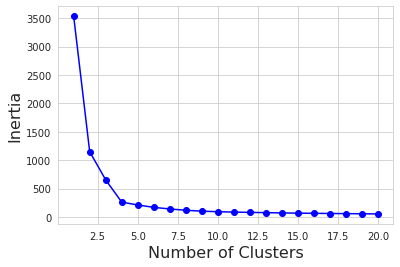

In [120]:
plt.plot(x, inertias_va, "bo-")
plt.xlabel("Number of Clusters",fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.show()

In [122]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.33772899139511137

In [123]:
kmeans_clusters = [KMeans(n_clusters=i, random_state=42).fit(X) for i in range(1,21)]

In [125]:
sh_scores = [silhouette_score(X, model.labels_) for model in kmeans_clusters[1:]]

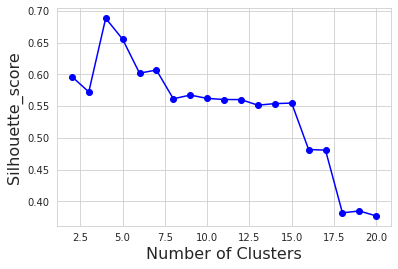

In [131]:
plt.plot(range(2,21), sh_scores, "bo-")
plt.xlabel("Number of Clusters",fontsize=16)
plt.ylabel("Silhouette_score", fontsize=16)
plt.show()

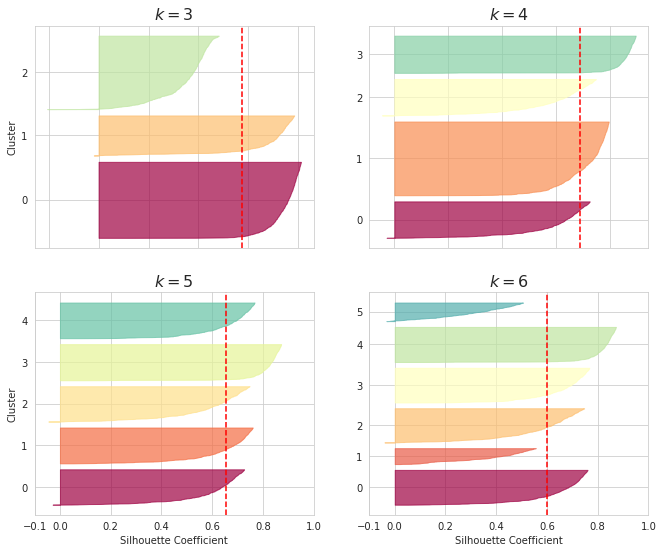

In [136]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(11, 9))


for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()